In [ ]:
%%time
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from skimage.morphology import skeletonize, thin
from medpy.filter.smoothing import anisotropic_diffusion
from multiprocessing import Pool
pool = Pool()
img = cv2.imread('/content/drive/My Drive/gg2.jpg')
img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CPU times: user 17.1 s, sys: 123 ms, total: 17.2 s
Wall time: 9.29 s


CPU times: user 61.7 ms, sys: 11.1 ms, total: 72.8 ms
Wall time: 145 ms


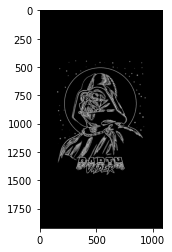

In [ ]:
%%time 
gaussian= np.array([[0.00025,0.000813,0.001884,0.00312,0.003691,0.00312,0.001884,0.000813,0.00025 ],
              [0.000813,0.002638,0.006115,0.010126,0.011979,0.010126,0.006115,0.002638,0.000813 ],
              [0.001884,0.006115,0.014175,0.023471,0.027767,0.023471,0.014175,0.006115,0.001884 ],
              [0.00312,0.010126,0.023471,0.038865,0.045979,0.038865,0.023471,0.010126,0.00312 ],
              [0.003691,0.011979,0.027767,0.045979,0.054394,0.045979,0.027767,0.011979,0.003691 ],
              [0.00312,0.010126,0.023471,0.038865,0.045979,0.038865,0.023471,0.010126,0.00312 ],
              [0.001884,0.006115,0.014175,0.023471,0.027767,0.023471,0.014175,0.006115,0.001884 ],
              [0.000813,0.002638,0.006115,0.010126,0.011979,0.010126,0.006115,0.002638,0.000813 ],
              [0.00025,0.000813,0.001884,0.00312,0.003691,0.00312,0.001884,0.000813,0.00025]])

mean=np.array([[0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568],
               [0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568],
               [0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568],
               [0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568],
               [0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568],
               [0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568],
               [0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568],
               [0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568],
               [0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568 ,0.01234568, 0.01234568, 0.01234568, 0.01234568]])
def solve1():
    com = cv2.filter2D(gray1, -1, mean)
    return com
def solve2():
    com1 = cv2.filter2D(gray1, -1, gaussian)
    return com1
result1 = pool.apply_async(solve1) 
result2 = pool.apply_async(solve2) 
com = result1.get(timeout=10)
com1 = result2.get(timeout=10)
com=((com1+com)/2)-8
gg1=gray1<=com
gg1 = gg1.astype(int)
gg1[gg1==1]=255
#skeletonization
ske1 = (skeletonize(gg1//255) * 255).astype(np.uint8)
plt.imshow(gg1, cmap='gray')
#saving 
cv2.imwrite('/content/drive/My Drive/abc1.jpg',ske1)